In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [10]:
attrition = pd.read_csv('Employee-Attrition.csv')

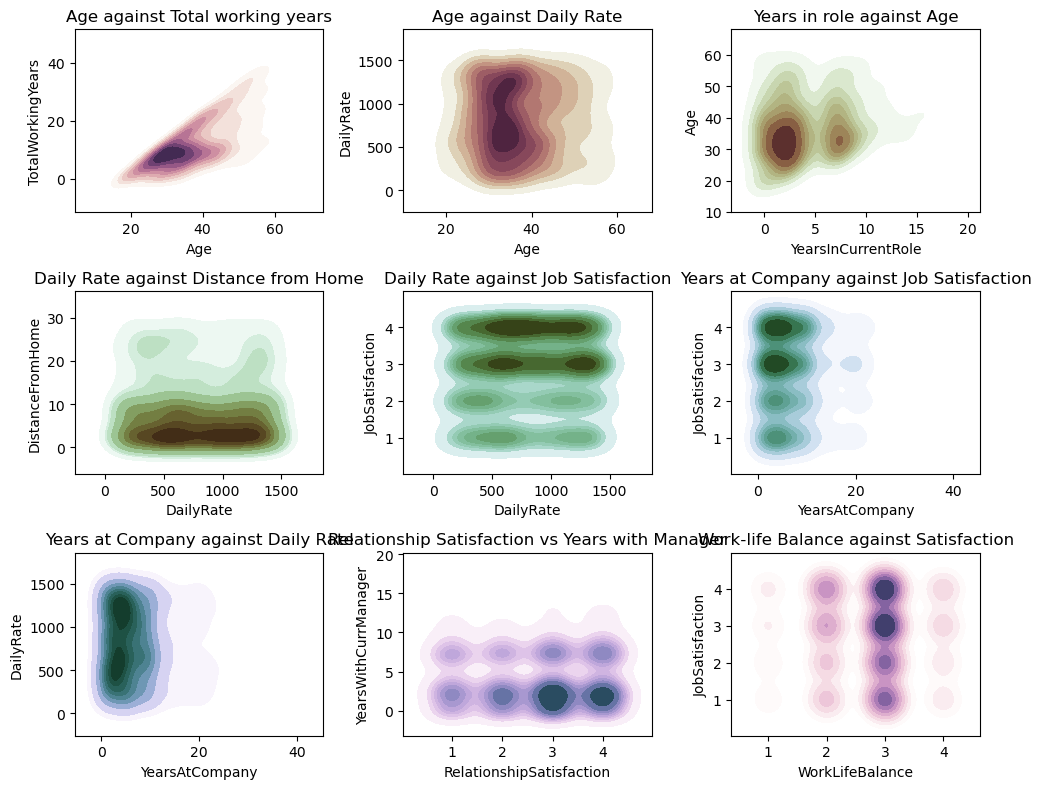

In [20]:
f, axes = plt.subplots(3, 3, figsize=(10, 8),
                       sharex=False, sharey=False)


s = np.linspace(0, 3, 10)

# 1
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['Age'],
    y=attrition['TotalWorkingYears'],
    cmap=cmap,
    fill=True,
    cut=5,
    ax=axes[0,0]
)
axes[0,0].set_title('Age against Total working years')

# 2
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['Age'],
    y=attrition['DailyRate'],
    cmap=cmap,
    fill=True,
    ax=axes[0,1]
)
axes[0,1].set_title('Age against Daily Rate')

# 3
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['YearsInCurrentRole'],
    y=attrition['Age'],
    cmap=cmap,
    fill=True,
    ax=axes[0,2]
)
axes[0,2].set_title('Years in role against Age')

# 4
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['DailyRate'],
    y=attrition['DistanceFromHome'],
    cmap=cmap,
    fill=True,
    ax=axes[1,0]
)
axes[1,0].set_title('Daily Rate against Distance from Home')

# 5
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['DailyRate'],
    y=attrition['JobSatisfaction'],
    cmap=cmap,
    fill=True,
    ax=axes[1,1]
)
axes[1,1].set_title('Daily Rate against Job Satisfaction')

# 6
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['YearsAtCompany'],
    y=attrition['JobSatisfaction'],
    cmap=cmap,
    fill=True,
    ax=axes[1,2]
)
axes[1,2].set_title('Years at Company against Job Satisfaction')

# 7
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['YearsAtCompany'],
    y=attrition['DailyRate'],
    cmap=cmap,
    fill=True,
    ax=axes[2,0]
)
axes[2,0].set_title('Years at Company against Daily Rate')

# 8
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['RelationshipSatisfaction'],
    y=attrition['YearsWithCurrManager'],
    cmap=cmap,
    fill=True,
    ax=axes[2,1]
)
axes[2,1].set_title('Relationship Satisfaction vs Years with Manager')

# 9
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
sns.kdeplot(
    x=attrition['WorkLifeBalance'],
    y=attrition['JobSatisfaction'],
    cmap=cmap,
    fill=True,
    ax=axes[2,2]
)
axes[2,2].set_title('Work-life Balance against Satisfaction')

f.tight_layout()


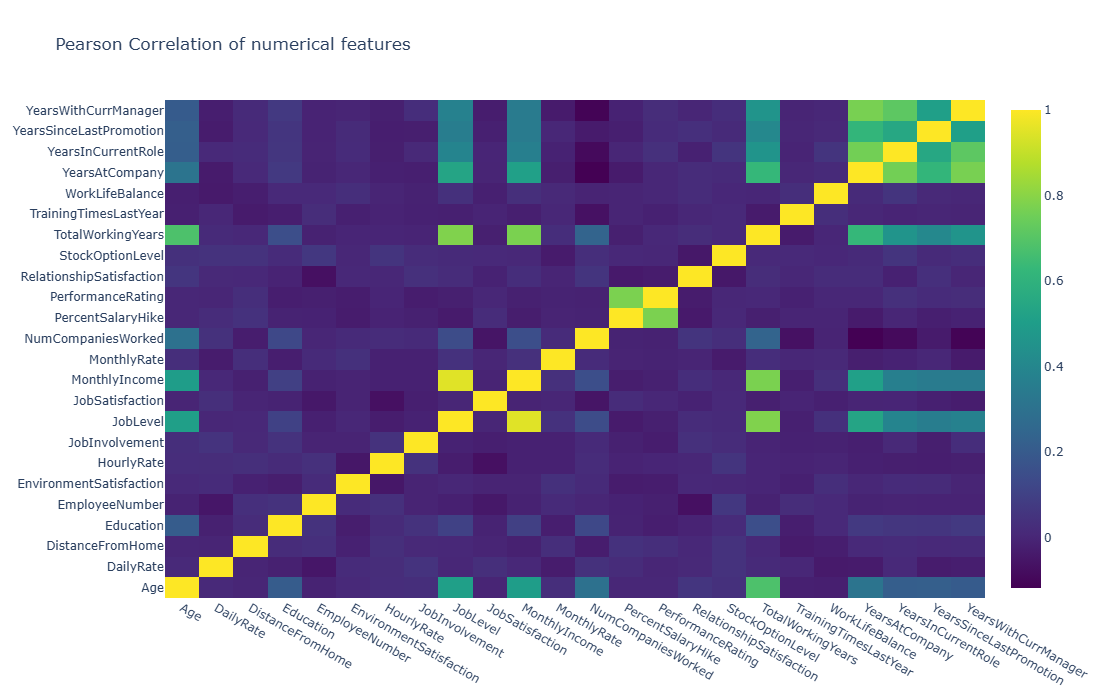

In [22]:
target_map = {'Yes':1, 'No':0}

attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

FEATURE ENGINEERING

In [26]:
categorical = attrition.select_dtypes(include='object').columns.tolist()
numerical = attrition.select_dtypes(exclude='object').columns.tolist()

In [28]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [30]:
target_map = {'Yes':1, 'No':0}
target = attrition["Attrition"].apply(lambda x: target_map[x])

In [36]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_val = train_test_split(
    attrition_final,
    target,
    train_size=0.80,
    random_state=0,
    stratify=target   # IMPORTANT for imbalanced data
)


In [42]:
seed = 0

rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 'sqrt',
    'max_depth': 4,
    'min_samples_leaf': 2,
    'random_state': seed
}


In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)

# Train Random Forest
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

# Predictions
rf_predictions = rf.predict(test)

print("Accuracy score:", accuracy_score(target_val, rf_predictions))
print("=" * 80)
print(classification_report(target_val, rf_predictions))


Accuracy score: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.64      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.76      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



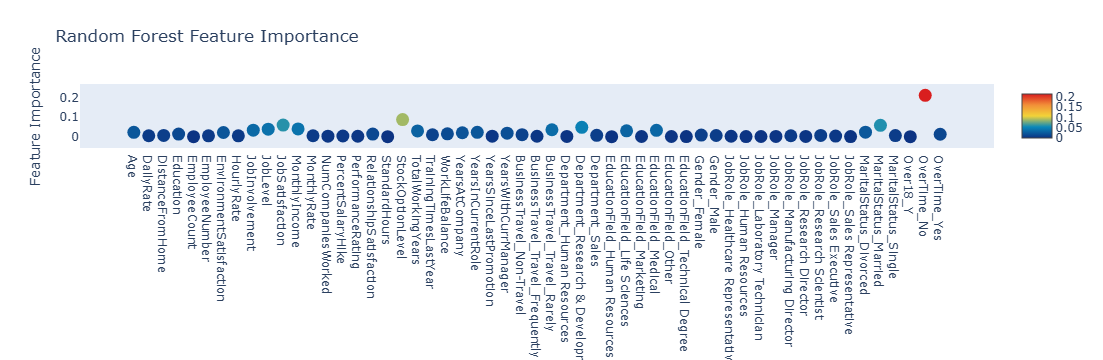

In [54]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')